   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  
Optimization terminated successfully.
         Current function value: 0.416865
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               survived 

<Figure size 800x600 with 0 Axes>

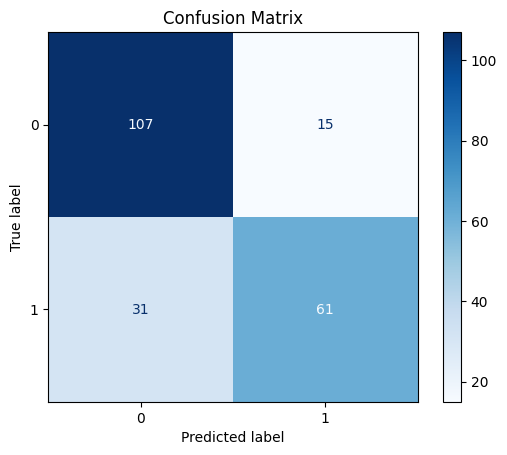

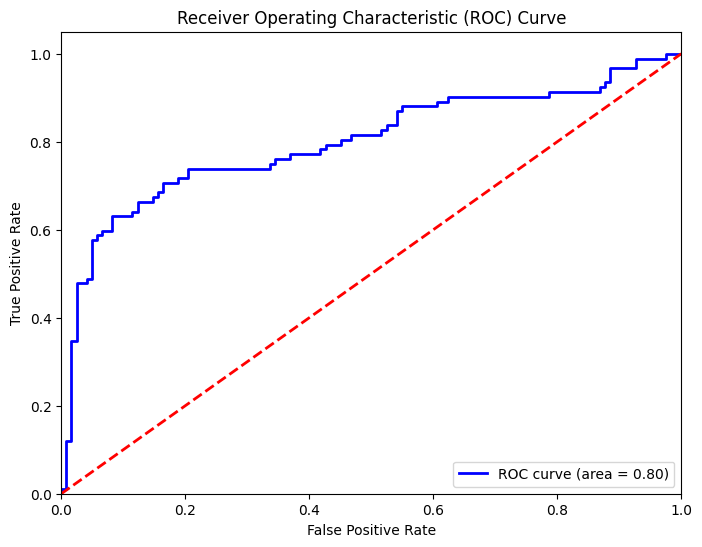

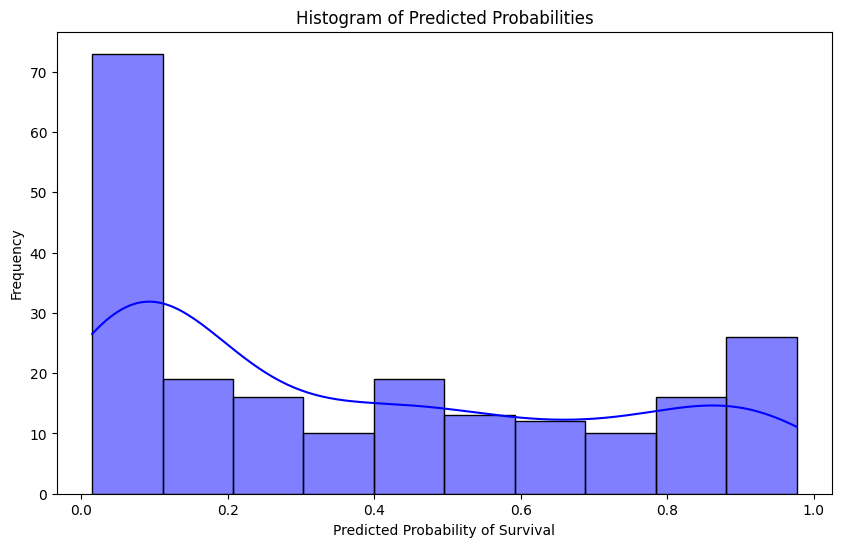

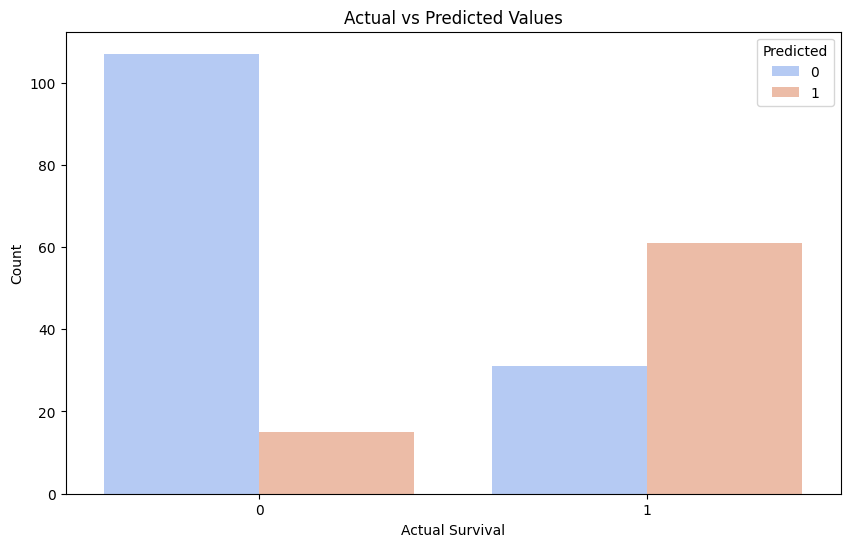

In [6]:
# Import required libraries
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score, ConfusionMatrixDisplay

# Load the Titanic dataset
df = sns.load_dataset('titanic')

# Display the first few rows of the dataset
print(df.head())

# Prepare the data
# Drop rows with missing values
df = df.dropna(subset=['age', 'embarked', 'fare'])

# Convert categorical variables into numerical format
df['sex'] = df['sex'].map({'male': 0, 'female': 1})
df['embarked'] = df['embarked'].map({'C': 0, 'Q': 1, 'S': 2})

# Select features and target variable
X = df[['pclass', 'sex', 'age', 'fare', 'embarked']]  # Predictor variables
y = df['survived']  # Target variable

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Add a constant to the predictor variables (intercept term)
X_scaled = sm.add_constant(X_scaled)

# Convert the scaled array back to a DataFrame and rename the columns
X_scaled_df = pd.DataFrame(X_scaled, columns=['const', 'pclass', 'sex', 'age', 'fare', 'embarked'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, y, test_size=0.3, random_state=42)

# Reset the indices of the training and testing sets
X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

# Fit the logistic regression model
logit_model = sm.Logit(y_train, X_train)
result = logit_model.fit()

# Print the model summary
print(result.summary())

# Make predictions on the test set
y_pred_prob = result.predict(X_test)
y_pred = (y_pred_prob >= 0.5).astype(int)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

# Visualize the Confusion Matrix
plt.figure(figsize=(8, 6))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

# Plot the ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Plot the Predicted Probabilities
plt.figure(figsize=(10, 6))
sns.histplot(y_pred_prob, bins=10, kde=True, color='blue')
plt.title('Histogram of Predicted Probabilities')
plt.xlabel('Predicted Probability of Survival')
plt.ylabel('Frequency')
plt.show()

# Plot the actual vs predicted values
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
plt.figure(figsize=(10, 6))
sns.countplot(x='Actual', hue='Predicted', data=results_df, palette='coolwarm')
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Survival')
plt.ylabel('Count')
plt.legend(title='Predicted', loc='upper right')
plt.show()